# Preprocessing

In [60]:
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network
import math
import re

In [6]:
path_data = '../data/'
link_cat_users = "catalonia_201906_1_users_csv_hashed.csv"
link_cat_tweets = "catalonia_201906_1_tweets_csv_hashed.csv"

In [7]:
users_df = pd.read_csv(path_data+link_cat_users)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   userid                    129 non-null    object
 1   user_display_name         129 non-null    object
 2   user_screen_name          129 non-null    object
 3   user_reported_location    34 non-null     object
 4   user_profile_description  54 non-null     object
 5   user_profile_url          7 non-null      object
 6   follower_count            129 non-null    int64 
 7   following_count           129 non-null    int64 
 8   account_creation_date     129 non-null    object
 9   account_language          129 non-null    object
dtypes: int64(2), object(8)
memory usage: 10.2+ KB


In [8]:
tweets_df = pd.read_csv(path_data+link_cat_tweets)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9489 entries, 0 to 9488
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   9489 non-null   int64  
 1   userid                    9489 non-null   object 
 2   user_display_name         9489 non-null   object 
 3   user_screen_name          9489 non-null   object 
 4   user_reported_location    4096 non-null   object 
 5   user_profile_description  9007 non-null   object 
 6   user_profile_url          293 non-null    object 
 7   follower_count            9489 non-null   int64  
 8   following_count           9489 non-null   int64  
 9   account_creation_date     9489 non-null   object 
 10  account_language          9489 non-null   object 
 11  tweet_language            9460 non-null   object 
 12  tweet_text                9489 non-null   object 
 13  tweet_time                9489 non-null   object 
 14  tweet_cl

In [9]:
tweets_df

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,1083299458501304321,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,idyZnUfuHIXEQkEsgVlT6rcV5hSlDTFtMNDlLPQsFqE=,NaN,NaN,NaN,33,106,2018-12-12,...,absent,absent,0.0,0.0,0.0,0.0,[],[],"['1049559666882211841', '12633652']",NaN
1,1057652411253342209,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,U07+ovhpwHvX886BsOrh+lgBxFc1gVDHbWiX3q3P5Q=,NaN,Barcelonina i independentista.,NaN,101,263,2018-02-13,...,absent,absent,0.0,0.0,0.0,0.0,[],[],"['220656573', '237413314', '22954354']",NaN
2,872833349810835457,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,...,absent,absent,0.0,0.0,0.0,0.0,['referèndum'],[],['84053338'],NaN
3,1070392954962018304,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,...,absent,absent,0.0,0.0,0.0,0.0,[],[],"['84053338', '2556327074']",NaN
4,937392994713468929,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,KP5YMWpjuwsjsDERWSgWmv6P9Mo52dSkR1VX9tOg1xo=,NaN,Ciberactivistes d'@Esquerra_ERC. Treballant de...,NaN,2459,4656,2013-03-01,...,absent,absent,0.0,0.0,0.0,0.0,[],[],"['84053338', '226640033']",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,1035477307060891648,738418101964951552,#FemXarxa per la República,XarxaRepublica,NaN,Participa de la xarxa per la República més gra...,https://t.co/C8OskO8QRy,12941,7547,2016-06-02,...,absent,absent,1.0,0.0,49.0,19.0,['LlibertatPresosPolítics'],[],['198141246'],NaN
9485,1075785843531489281,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,"Barcelona, Espanya",El diari de la informació en moviment. Segueix...,https://t.co/eM35hqqOFD,617,1350,2017-11-20,...,absent,absent,1.0,0.0,0.0,0.0,[],['https://elvapor.net/2018/12/20/nuria-de-gisp...,"['3578809229', '274058005']",NaN
9486,1069910801434202112,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,gD0tW1UsTJ84HRIgqhF8kPd1A8TnEAwgvHMlBx5cVQ=,"Barcelona, Espanya",El diari de la informació en moviment. Segueix...,https://t.co/eM35hqqOFD,617,1350,2017-11-20,...,absent,absent,0.0,1.0,0.0,0.0,[],"['http://directe.cat', 'https://elvapor.net/20...",['13777542'],NaN
9487,730362464592924672,zcjq53ah8JMLh5XvL3sNbtReAefJI5gCCPCxSLmIgpU=,zcjq53ah8JMLh5XvL3sNbtReAefJI5gCCPCxSLmIgpU=,zcjq53ah8JMLh5XvL3sNbtReAefJI5gCCPCxSLmIgpU=,"Barcelona, Cataluña","Educador social. Entre todos, todo!",NaN,553,2451,2016-01-11,...,absent,absent,0.0,2.0,11.0,43.0,[],[],[],NaN


In [10]:
tweets_df = tweets_df.drop(["poll_choices"], axis=1)

# Analyzes

## Statistical

**Time interval**

In [55]:
tweets_df["tweet_time"] = tweets_df["tweet_time"].astype("datetime64")

<AxesSubplot: xlabel='tweet_time'>

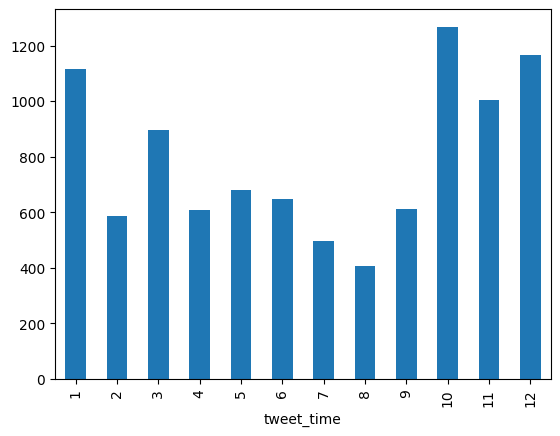

In [93]:
tweets_df.groupby(tweets_df["tweet_time"].dt.month)["tweetid"].count().plot(kind="bar")

Seems to tweet less during summer ?

<AxesSubplot: xlabel='tweet_time,tweet_time'>

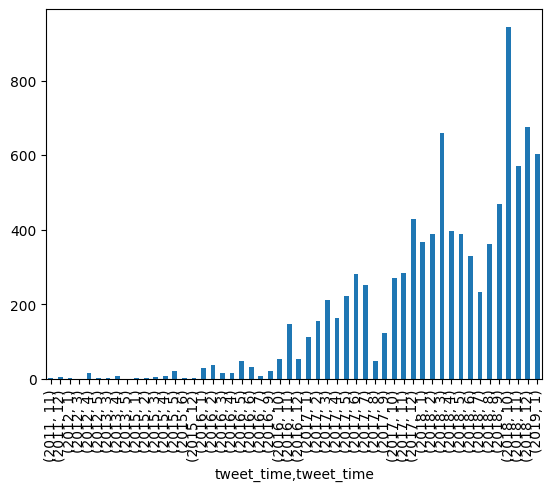

In [92]:
tweets_df.groupby([tweets_df["tweet_time"].dt.year, tweets_df["tweet_time"].dt.month])["tweetid"].count().plot(kind="bar")

Those account were starting to increase their tweets before the Catalan Crisis that start on **28 October 2017**. Ater this date there is a huge increase in tweet.

### Account creation date

In [99]:
users_df["account_creation_date"] = users_df["account_creation_date"].astype("datetime64")

<AxesSubplot: xlabel='account_creation_date,account_creation_date'>

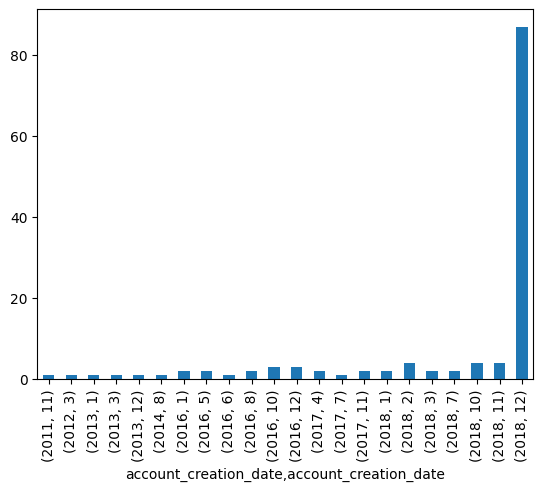

In [100]:
users_df.groupby([users_df["account_creation_date"].dt.year, users_df["account_creation_date"].dt.month])["account_creation_date"].count().plot(kind="bar")

As we can see a lot of the account categorized as "violating the law of twitter" where new account which were probably created for this political astroturfing campaign.

<AxesSubplot: xlabel='account_creation_date,account_creation_date'>

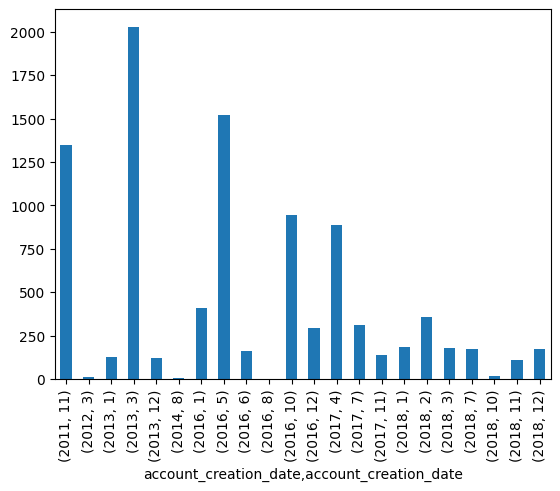

In [101]:
tweets_df.groupby([tweets_df["account_creation_date"].dt.year, tweets_df["account_creation_date"].dt.month])["account_creation_date"].count().plot(kind="bar")

However from this barplot, we can see that accounts that published most tweets (in our dataset), are account which were created a long time before the Catalan Crisis.

**Repartition of retweet**

<AxesSubplot: >

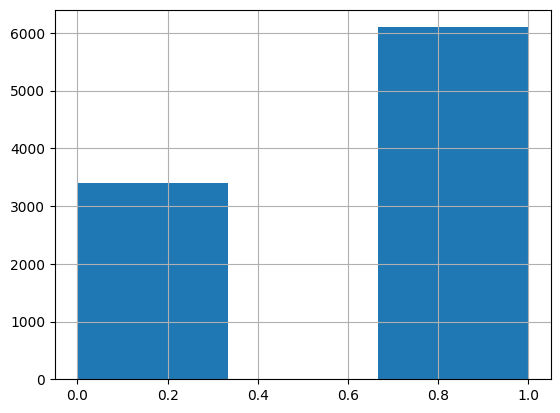

In [16]:
tweets_df.is_retweet.astype(int).hist(bins=3)

## Retweet graph
### Create Graph and add node 
**one node for each user with a weight based on number of follower** 

In [50]:
true_rt_df = tweets_df[tweets_df["is_retweet"]==True]
true_rt_df = true_rt_df[true_rt_df["retweet_userid"].notna()==True]

In [167]:
G=nx.DiGraph()

In [168]:
for index, row in users_df.iterrows():
    G.add_node(str(index), size=5*math.log(row["follower_count"]+2))

In [169]:
for index, row in true_rt_df.iterrows():
    value = len(true_rt_df[(true_rt_df.userid == row["userid"]) & (true_rt_df.retweet_userid == row["retweet_userid"])].index)
    G.add_edge(
        str(users_df[users_df.userid == row["userid"]].index[0]), 
        str(users_df[users_df.userid == row["retweet_userid"]].index[0]), 
        color="green",
        value=value
    )

In [176]:
nt = Network(
    height="750px", 
    width="100%",
    bgcolor="#222222", 
    font_color="white",
    directed=True
    )
nt.from_nx(G)
nt.toggle_physics(True)
nt.show('nx.html')

## In reply graph
### Create Graph and add node 
**one node for each user with a weight based on number of follower** 

In [187]:
in_reply_df = tweets_df[tweets_df["in_reply_to_userid"].notna()==True]

In [195]:
in_reply_df.tweet_text

196     @portet_bruguera @QuimTorraiPla @ensenyamentca...
219     @portet_bruguera @CridaNacional @sergisabria S...
235     Sorprendente la decisión de @CUPBarcelona de l...
238     @thesanirac @AlfredBosch @ERC9B @Esquerra_ERC ...
240     @portet_bruguera @Esquerra_ERC @JuntsXCat @par...
                              ...                        
9437    @portet_bruguera Mare de deu, Marc. Ets vomiti...
9449          @Pdemocratacat @joanbague @UN #BuchDimissio
9450    @portet_bruguera Fa vergonya. Nom�s et dedique...
9463         @portet_bruguera Portet, esta l'amo content?
9469    @portet_bruguera @KRLS @JuntsXCat En tot cas, ...
Name: tweet_text, Length: 2212, dtype: object

In [188]:
in_reply_graph=nx.DiGraph()

In [189]:
for index, row in users_df.iterrows():
    in_reply_graph.add_node(str(index), size=5*math.log(row["follower_count"]+2))

In [191]:
for index, row in in_reply_df.iterrows():
    value = len(in_reply_df[(in_reply_df.userid == row["userid"]) & (in_reply_df.in_reply_to_userid == row["in_reply_to_userid"])].index)
    if len(users_df[users_df.userid == row["in_reply_to_userid"]]) != 0:
        in_reply_graph.add_edge(
            str(users_df[users_df.userid == row["userid"]].index[0]), 
            str(users_df[users_df.userid == row["in_reply_to_userid"]].index[0]), 
            color="green",
            value=value
        )

In [192]:
nt = Network(
    height="750px", 
    width="100%",
    bgcolor="#222222", 
    font_color="white",
    directed=True
    )
nt.from_nx(in_reply_graph)
nt.toggle_physics(True)
nt.show('nx_in_reply.html')

## Co-tweet network

In [94]:
tweets_df[tweets_df["is_retweet"]==False]["tweet_text"].value_counts().head(5)

Un dia menys pel #21D i el president KRLS encara no ha explicat com s'ho farà per ser investit president.                                                                                                                                                  18
La bateria d'incompliments del govern Colau que ha fet @AlfredBosch s'hauria de passar a les escoles #RecuperemBCN                                                                                                                                          2
@nfJXp0ghRv6KgKuVFUBZMmmLP53wUoQXxeQlPmyKI= @ernestmaragall Maragall                                                                                                                                                                                        2
👉 Vine aquesta tarda a la presentació del Consell per la República!\n\n🙌 Seguirem les intervencions del President Puigdemont, el President Torra, el vicepresident Aragonès i el Conseller Comín.\n\n📍Plaça de Sant Jaume, 19h. https://t.co/L

In [20]:
tweets_df[tweets_df["tweet_text"] == "Un dia menys pel #21D i el president KRLS encara no ha explicat com s'ho farà per ser investit president."]["userid"].value_counts()

BL3MWry3mDc5fsUPQOzEoln7zrpLVpHfc6akUcg7eY=    18
Name: userid, dtype: int64

In [28]:
df = tweets_df[tweets_df["tweet_text"].duplicated()]
len(df[df["is_retweet"]==False])

19

**Observation**

In this dataset there is no Co-tweet networks perhaps we only have 9k tweets.
However we still see the user with the id *BL3MWry3mDc5fsUPQOzEoln7zrpLVpHfc6akUcg7eY=* who posted the same tweet everyday for 18 days.

We also observe that there is only 19 rows which have duplicate tweet text. We can then ofc cannot observe good co-tweet network. 

## Analyzes of the word used in the tweet texts.

In [41]:
word_df = pd.DataFrame(data={'word': [], 'occurence': []})
a =str()
a.replace(".")

In [ ]:
for index, row in tweets_df.iterrows():
    for word in row["tweet_text"].split(" "):
        if word in word_df["word"].unique():
            word_df.at[word_df[word_df["word"] == word].index[0],"occurence"] += 1
        else:
            word_df.loc[len(word_df.index)] = [word, 1]

In [54]:
word_df[word_df["word"].str.len() > 3].sort_values(by="occurence", ascending=False).head(20)

,word,occurence
1095,@AlfredBosch:,987.0
849,@ERCbcn:,604.0
926,@AlfredBosch,547.0
280,dels,471.0
37,@Esquerra_ERC:,420.0
884,@Esquerra_ERC,411.0
253,Barcelona,406.0
740,sobre,404.0
242,govern,393.0
455,@KRLS,302.0


**clean the data**

In [69]:
word_df

,word,occurence
0,RT,6132.0
1,@ratafia:,4.0
2,Hola,53.0
3,@joanpuig,5.0
4,es,811.0
...,...,...
33055,vuelven!,1.0
33056,https://t.co/5TkUPnSNRf,1.0
33057,bons.,1.0
33058,"Bé,",1.0


In [72]:
def filter(row):
    res = re.sub(r'[^@\w\s]', '', row.word)
    res = "" if "http" in res else res
    return res, row.occurence

In [74]:
word_df_clean = word_df.apply(filter, axis=1, result_type='broadcast')

In [76]:
word_df_clean = word_df_clean[word_df_clean.word != ""]

In [83]:
word_df_clean = word_df_clean.groupby(['word'], axis=0, as_index=False).sum()

In [89]:
word_df_clean.sort_values(by="occurence", ascending=False).head(10)

,word,occurence
11070,de,7293.0
6744,RT,6136.0
15296,la,5334.0
7864,a,5042.0
18803,que,4881.0
14333,i,3624.0
12355,el,3360.0
16913,no,2186.0
17627,per,2131.0
804,@AlfredBosch,1642.0


In [84]:
word_df_clean[word_df_clean["word"].str.len() > 3].sort_values(by="occurence", ascending=False).head(20)

,word,occurence
804,@AlfredBosch,1642.0
1102,@ERCbcn,901.0
1164,@Esquerra_ERC,869.0
3444,Barcelona,633.0
11298,dels,481.0
13972,govern,444.0
1427,@KRLS,432.0
20252,sobre,410.0
3883,Colau,375.0
770,@AdaColau,315.0


**From what we can see, must of tweets where engaging with prominent figure of the indendance movmeent of Catalonia**

We can note that this data set contains at the same time retweet and tweet, so ti's possible that accounts present in the the dataset where engaging in retweeting a lot those figure as a way of boosting their audience. 

Also with the co-tweet network we can see that in our tweet dataset accounts weren't that much involved in retweeting themselves. They didn't interacts that much together.